# **1. Import libraries**

In [147]:
import pandas as pd  # read csv
import tensorflow as tf  # deep learning model
import matplotlib.pyplot as plt  # plot graph
import numpy as np  # vector calculation
import seaborn as sns  # data visualization
import math  # math operation
from sklearn.model_selection import RandomizedSearchCV  # random search for hyperparameters
from keras.models import Sequential  # used in deep learning model
from keras.layers import Dense  # dense for deep learning
from keras.wrappers.scikit_learn import KerasRegressor  # deep learning regression model
from sklearn import preprocessing  # for data normalization
from sklearn.model_selection import train_test_split  # split train and test dataset
from tensorflow import keras  # for deep learning
from tensorflow.keras import layers  # layers in deeplearning model
import timeit  # to capture run time
from sklearn.metrics import make_scorer  # accuracy score
import warnings  # to eliminate warning when plotting graph
warnings.filterwarnings('ignore')

# **2. Data preparation**

## 2.1 *load data*

In [2]:
data = pd.read_csv('C:\\Users\\Saeth\\Downloads\\archive\\kc_house_data.csv')  # read data
data.head()  # show 5 records

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.describe()  # descripb data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


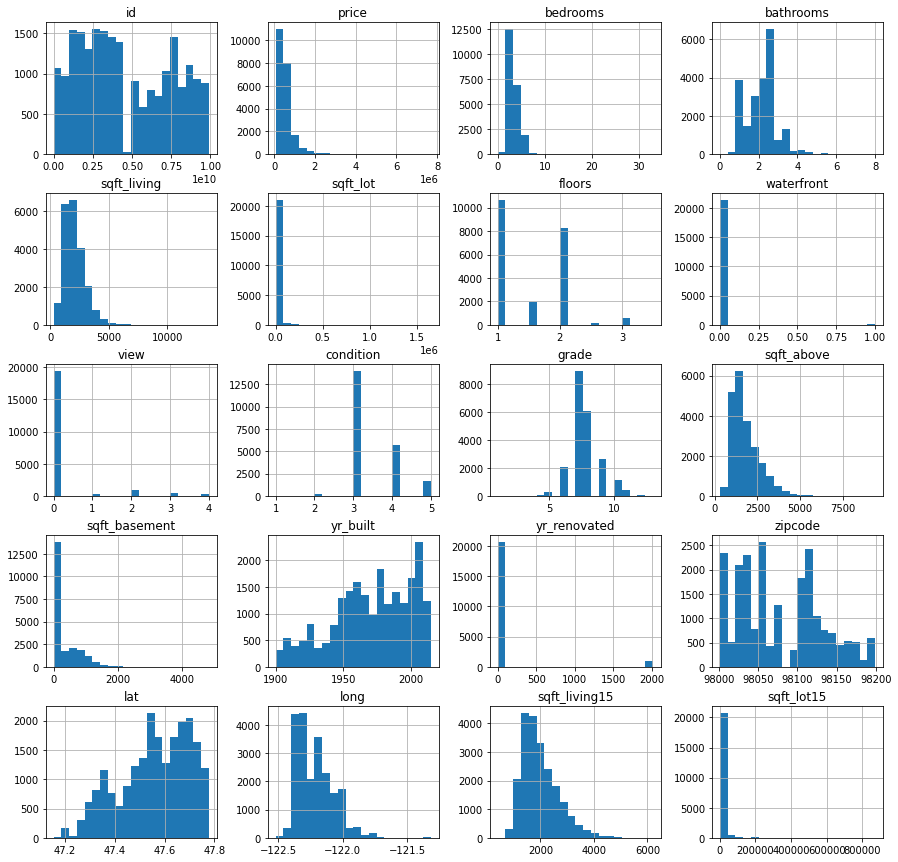

In [4]:
# histogram plot
data.hist(bins=20,figsize=(15,15),grid=True);

## *2.2 Data cleaning and preparation*

### 2.2.1 deal with data type

In [5]:
# check null values
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [6]:
# check type of each feature
for column in data.columns:
    print(column + ' :', data[column].dtype)

id : int64
date : object
price : float64
bedrooms : int64
bathrooms : float64
sqft_living : int64
sqft_lot : int64
floors : float64
waterfront : int64
view : int64
condition : int64
grade : int64
sqft_above : int64
sqft_basement : int64
yr_built : int64
yr_renovated : int64
zipcode : int64
lat : float64
long : float64
sqft_living15 : int64
sqft_lot15 : int64


There is no null values

In [7]:
# change date string into int
data['date'][:5]

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object

In [8]:
def dateNumber(string):
    """
        Transform date string into int
        Input: string
        Output: int of year*365 + month*30 + day
    """
    return int(string[:4])*365 + int(string[4:6])*30 + int(string[6:8])
data['date'] = data['date'].apply(dateNumber)
data['date'][:5]

0    735423
1    735479
2    735560
3    735479
4    735553
Name: date, dtype: int64

In [9]:
# check bathroom
data['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [10]:
# find index where numbers after '.' are not 0 and 5
index = []
for record in range(len(data)):
    if str(data['bathrooms'].iloc[record]).split('.')[1] not in ['0', '5']:
        index.append(record)
print('total incorrect bathrooms:', len(index))

total incorrect bathrooms: 7229


In [11]:
# drop all record from data with specificed index
data.drop(index = index, inplace = True)
data['bathrooms'].unique()

array([1. , 3. , 2. , 4.5, 1.5, 2.5, 4. , 3.5, 5. , 0. , 6. , 0.5, 5.5,
       8. , 7.5, 6.5])

In [12]:
# check floors
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [13]:
# round values of floors
data["floors"] = round(data["floors"])

In [14]:
data['floors'].unique()  # floor

array([1., 2., 3., 4.])

In [15]:
# check other features
data['waterfront'].unique()

array([0, 1], dtype=int64)

In [16]:
data['view'].unique()  # view

array([0, 3, 2, 4, 1], dtype=int64)

In [17]:
data['condition'].unique()  # condition

array([3, 5, 4, 1, 2], dtype=int64)

In [18]:
data['grade'].unique()  # grade

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [19]:
# drop id
data.drop(columns=["id"], inplace = True)
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,735423,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,735560,180000.0,2,1.0,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,735479,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,735553,510000.0,3,2.0,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,735272,1225000.0,4,4.5,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [20]:
data.shape  # data shape

(14384, 20)

### 2.2.2 correlation and features selection

<AxesSubplot:>

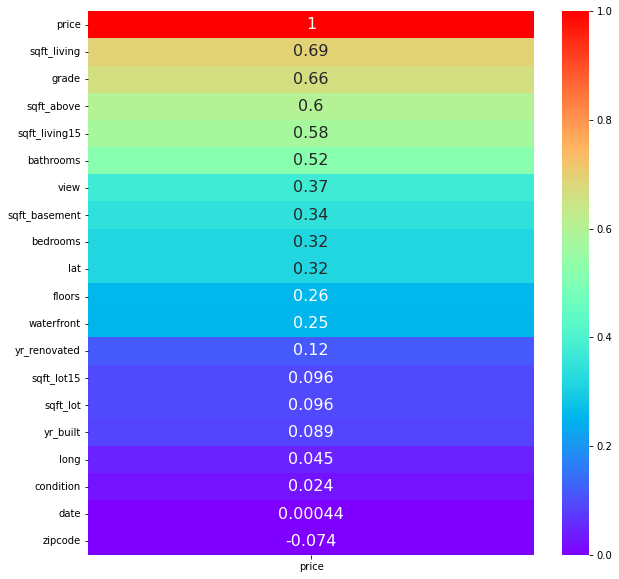

In [21]:
# Find the correlation value of each feature versus price
top_features = data.corr()[['price']].sort_values(by=['price'],ascending=False)
plt.figure(figsize=(10,10))
sns.heatmap(top_features,cmap='rainbow',annot=True,annot_kws={"size": 16},vmin=0)

In [22]:
# Drop the features that has correlation value less than 0.2
data = data.drop(columns = ["yr_renovated","sqft_lot", "sqft_lot15", "yr_built", "zipcode", "condition", "long", "date"])
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.0,1180,1.0,0,0,7,1180,0,47.5112,1340
2,180000.0,2,1.0,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.0,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.0,1680,1.0,0,0,8,1680,0,47.6168,1800
5,1225000.0,4,4.5,5420,1.0,0,0,11,3890,1530,47.6561,4760


In [23]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,1.438400e+04,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,5.150540e+05,3.300820,2.042339,2006.552767,1.567367,0.005492,0.198623,7.587041,1776.785526,229.767241,47.556094,1945.395926
std,3.452071e+05,0.925409,0.821169,923.204089,0.551632,0.073908,0.707010,1.202474,831.733632,409.635616,0.138825,688.610925
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,47.162200,460.000000
25%,3.090000e+05,3.000000,1.000000,1310.000000,1.000000,0.000000,0.000000,7.000000,1150.000000,0.000000,47.466975,1440.000000
50%,4.349000e+05,3.000000,2.000000,1830.000000,2.000000,0.000000,0.000000,7.000000,1560.000000,0.000000,47.566000,1780.000000
75%,6.222000e+05,4.000000,2.500000,2520.000000,2.000000,0.000000,0.000000,8.000000,2250.000000,370.000000,47.676825,2340.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,4.000000,1.000000,4.000000,13.000000,9410.000000,4130.000000,47.777600,6210.000000


### 2.2.3 normalize data

In [24]:
# normalize to [0, 1]
d = preprocessing.normalize(data, axis=0)
data = pd.DataFrame(d, columns = data.columns)
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,0.002984,0.007297,0.003788,0.004455,0.005018,0.0,0.0,0.007598,0.005015,0.000000,0.008330,0.005414
1,0.002421,0.004865,0.003788,0.002907,0.005018,0.0,0.0,0.006513,0.003273,0.000000,0.008370,0.010990
2,0.008122,0.009729,0.011364,0.007399,0.005018,0.0,0.0,0.007598,0.004463,0.016155,0.008332,0.005495
3,0.006858,0.007297,0.007576,0.006342,0.005018,0.0,0.0,0.008683,0.007140,0.000000,0.008349,0.007273
4,0.016473,0.009729,0.017045,0.020461,0.005018,0.0,0.0,0.011940,0.016533,0.027162,0.008355,0.019232


In [25]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,0.006926,0.008028,0.007736,0.007575,0.007865,0.000618,0.002255,0.008235,0.007552,0.004079,0.008338,0.007860
std,0.004642,0.002251,0.003110,0.003485,0.002768,0.008315,0.008027,0.001305,0.003535,0.007272,0.000024,0.002782
min,0.001009,0.000000,0.000000,0.001095,0.005018,0.000000,0.000000,0.001085,0.001233,0.000000,0.008269,0.001859
25%,0.004155,0.007297,0.003788,0.004945,0.005018,0.000000,0.000000,0.007598,0.004888,0.000000,0.008322,0.005818
50%,0.005848,0.007297,0.007576,0.006908,0.010036,0.000000,0.000000,0.007598,0.006630,0.000000,0.008340,0.007192
75%,0.008367,0.009729,0.009470,0.009513,0.010036,0.000000,0.000000,0.008683,0.009563,0.006569,0.008359,0.009454
max,0.103547,0.026755,0.030303,0.051114,0.020072,0.112509,0.045416,0.014111,0.039994,0.073320,0.008377,0.025091


### 2.2.4 detect and remove outliers

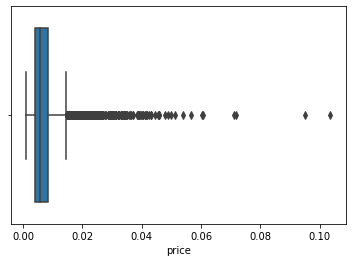

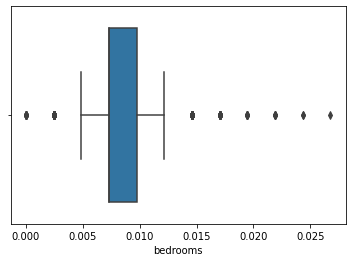

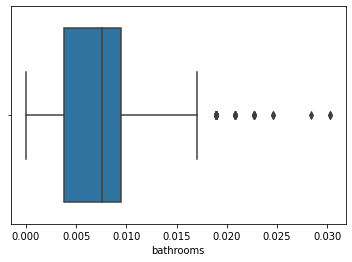

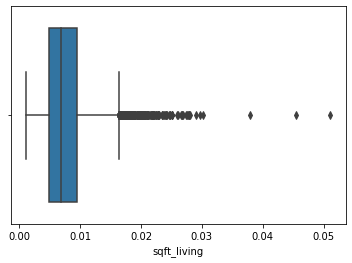

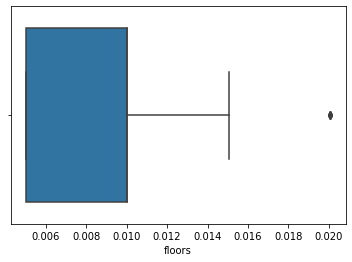

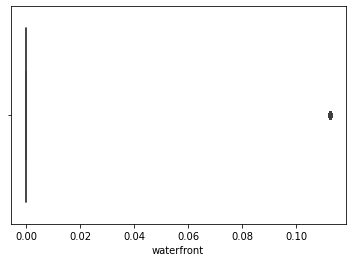

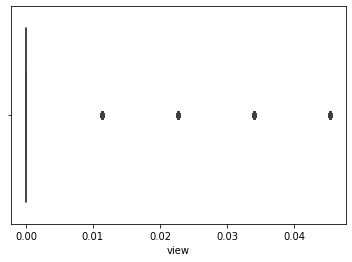

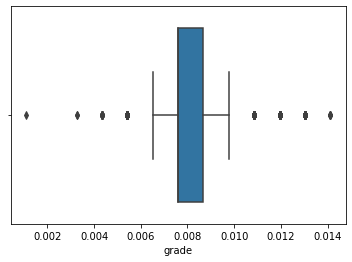

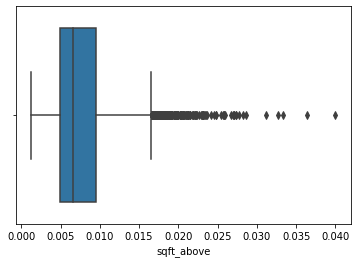

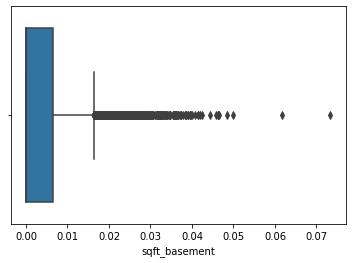

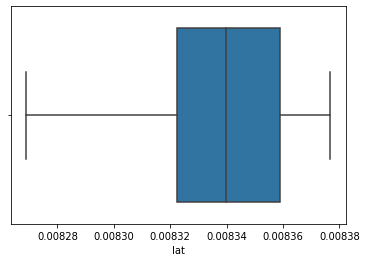

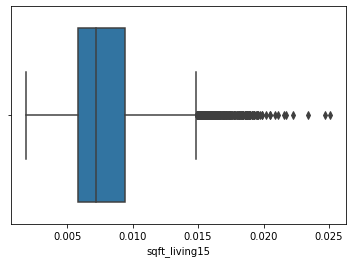

In [26]:
# Box plot to visualize outliers
for col in data.columns:
  sns.boxplot(x = data[col])
  plt.show()

In [27]:
def remove_outlier(x):  
  '''
  Remove the points which are 3 standard deviation away from the mean

  Parameter:
  ------------------------------
  x - the inputa dataframe data

  Return
  ------------------------------
  outlier_remove_data - a dataframe already removed outliers
  '''
  out = []
  threshold=3
  outlier_remove_data = x.copy()
  for y in outlier_remove_data.columns:
    mean_1 = float(x[y].mean())
    std_1 = float(x[y].std())

    for i in outlier_remove_data[y]:
      
      z_score= (i - mean_1)/std_1

      if np.abs(z_score) > threshold :
        outlier_remove_data = outlier_remove_data.loc[outlier_remove_data[y] != i] 
    
  return outlier_remove_data

# Remove outliers
data = remove_outlier(data)
display(data)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,0.002984,0.007297,0.003788,0.004455,0.005018,0.0,0.0,0.007598,0.005015,0.000000,0.008330,0.005414
1,0.002421,0.004865,0.003788,0.002907,0.005018,0.0,0.0,0.006513,0.003273,0.000000,0.008370,0.010990
2,0.008122,0.009729,0.011364,0.007399,0.005018,0.0,0.0,0.007598,0.004463,0.016155,0.008332,0.005495
3,0.006858,0.007297,0.007576,0.006342,0.005018,0.0,0.0,0.008683,0.007140,0.000000,0.008349,0.007273
5,0.003925,0.007297,0.005682,0.004002,0.005018,0.0,0.0,0.007598,0.004505,0.000000,0.008312,0.006667
...,...,...,...,...,...,...,...,...,...,...,...,...
14379,0.013548,0.009729,0.013258,0.013250,0.010036,0.0,0.0,0.009769,0.011050,0.016155,0.008338,0.008283
14380,0.006388,0.007297,0.009470,0.004945,0.010036,0.0,0.0,0.008683,0.005015,0.002308,0.008342,0.005374
14381,0.004841,0.007297,0.009470,0.005776,0.015054,0.0,0.0,0.008683,0.006503,0.000000,0.008363,0.006182
14382,0.005379,0.009729,0.009470,0.008720,0.010036,0.0,0.0,0.008683,0.009818,0.000000,0.008330,0.007394


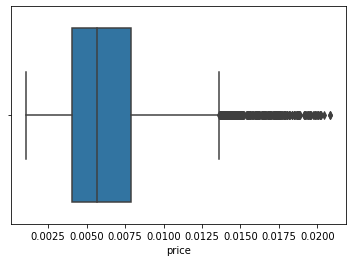

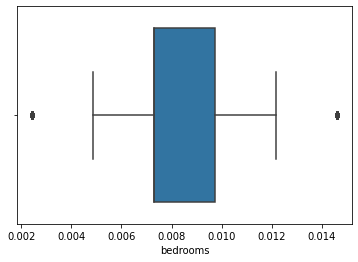

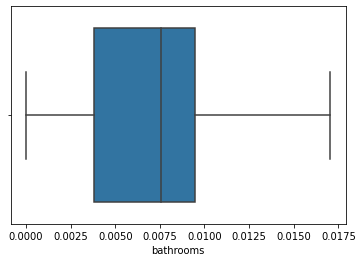

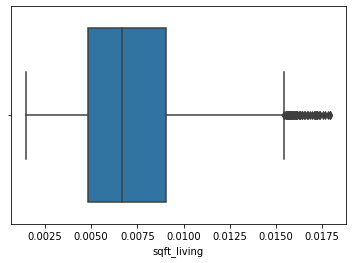

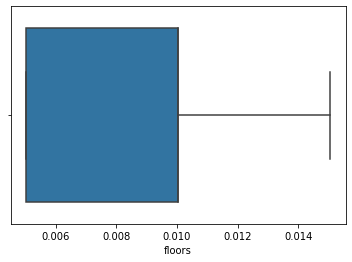

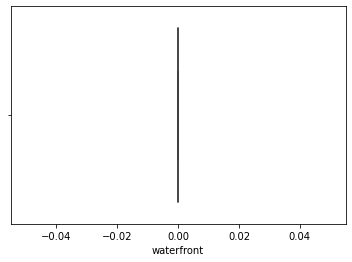

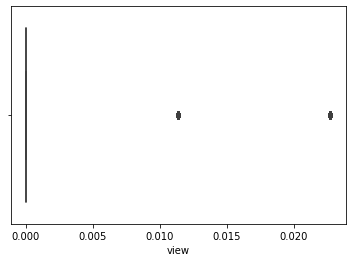

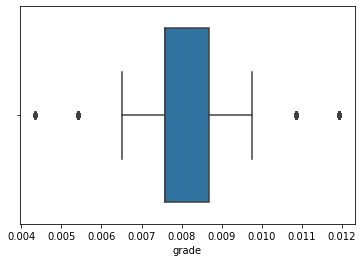

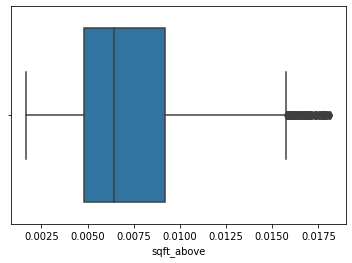

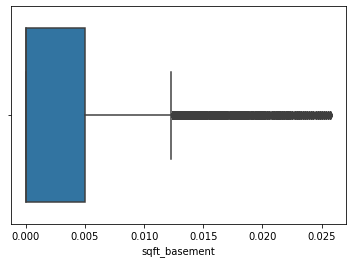

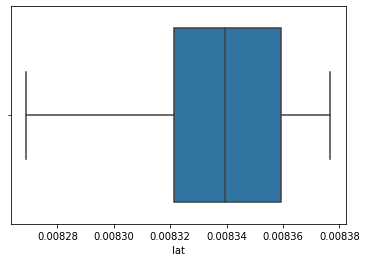

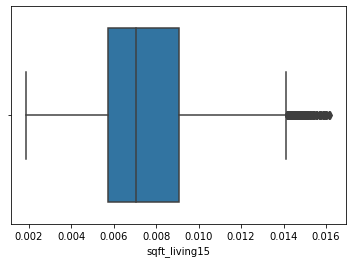

In [200]:
# Box plot to visualize outliers
for col in data.columns:
  sns.boxplot(x = data[col])
  plt.show()

### 2.2.5 test and train split

In [28]:
# split data into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["price"]), data.price, train_size=0.8, random_state=25,shuffle=True)

# **3. finding an initial hyperparameters' configuration**

## 3.1 function to create models

In [29]:
# Function to generate the number of nodes for the hidden layers, 
# by linearly varying the number of nodes between the supplied values for the outermost hidden layers.

def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    '''
    Function to generate the number of nodes for the hidden layers, 
    by linearly varying the number of nodes between the supplied values for the outermost hidden layers.
    
    Parameter
    -----------------------
    n_layers = number of layers
    first_layer_nodes = number of nodes in first layer
    last_layer_nodes = number of nodes in last layer
    
    Return
    -----------------------
    layers - the list contains number of nodes in each layer
    '''
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    return layers

# Function to create model, required for KerasClassifier
def create_model(n_layers, first_layer_nodes, last_layer_nodes,activation,optimizer, loss, learning_rate):
    '''
    Function to generate the model with the defined configuration, 
    
    Parameter
    -----------------------
    n_layers = number of layers
    first_layer_nodes = number of nodes in first layer
    last_layer_nodes = number of nodes in last layer
    activation = activation function
    optimizer = optimizer method
    loss = loss calculation method
    learning_rate = rate of learning
    
    Return
    -----------------------
    the model
    '''
    # create model
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=X_train.shape[1], activation=activation))
        else:
            model.add(Dense(n_nodes[i-1], activation=activation))
    model.add(Dense(last_layer_nodes, activation='linear'))
    # Compile model
    if optimizer == 'Adam':
        model.compile(loss=loss, optimizer=keras.optimizers.Adam(learning_rate=learning_rate))
    elif optimizer == 'SGD':
        model.compile(loss=loss, optimizer=keras.optimizers.SGD(learning_rate=learning_rate))
    elif optimizer == 'RMSprop':
        model.compile(loss=loss, optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate))
    elif optimizer == 'Adamax':
        model.compile(loss=loss, optimizer=keras.optimizers.Adamax(learning_rate=learning_rate))
    else:
        model.compile(loss=loss, optimizer=keras.optimizers.Nadam(learning_rate=learning_rate))
        
    return model

## 3.2 random search cv

In [30]:
# define hyperparameters
optimizer = ['Adam', 'RMSprop']
first_layer_nodes  = [5,10,15]
last_layer_nodes  = [1]
n_layers = [3,5]
activation = ['relu', 'sigmoid']
loss = ["mean_squared_error", "mean_absolute_error"]
batch_size = [16, 64, 128]
epochs = [50, 100, 150]
learning_rate = [0.0001, 0.01, 0.1]

# accuracy score function (MAPE)
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)
 
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)

print('start')
start = timeit.default_timer()

# load dataset
X = X_train
Y = y_train

# create model
model = KerasRegressor(build_fn=create_model, verbose=0)

# param_grid is a dictionary that has hyperparameters and its values
param_grid = dict(optimizer=optimizer,
                  first_layer_nodes = first_layer_nodes,
                  last_layer_nodes = last_layer_nodes,
                  n_layers = n_layers,
                  activation = activation,
                  loss = loss,
                  batch_size = batch_size,
                  epochs = epochs,
                  learning_rate = learning_rate)

# Run the model
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=custom_Scoring, n_iter=500, cv=5, n_jobs = -1)
grid_result = grid.fit(X, Y)
stop = timeit.default_timer()

# Print total run time
print('total run time: ', (stop - start), 'Sec')

start
total run time:  10901.2407401 Sec


In [62]:
df = pd.DataFrame(grid_result.cv_results_)  # result of the models

In [32]:
# Display the top rank_test_score
display(df.sort_values(["rank_test_score"]).head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,param_n_layers,param_loss,param_learning_rate,param_last_layer_nodes,param_first_layer_nodes,...,param_activation,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
30,44.663122,1.053126,0.623389,0.195100,Adam,5,mean_absolute_error,0.0001,1,10,...,relu,"{'optimizer': 'Adam', 'n_layers': 5, 'loss': '...",72.910943,73.600604,69.356887,72.699799,72.103594,72.134365,1.468876,1
348,173.649982,5.966335,0.772119,0.153989,Adam,5,mean_absolute_error,0.0001,1,15,...,relu,"{'optimizer': 'Adam', 'n_layers': 5, 'loss': '...",73.577289,70.121606,70.397639,71.793506,74.096753,71.997359,1.613861,2
317,38.058777,1.070977,0.493053,0.176865,RMSprop,3,mean_absolute_error,0.0001,1,15,...,relu,"{'optimizer': 'RMSprop', 'n_layers': 3, 'loss'...",71.038512,74.044202,69.671208,72.479802,71.989668,71.844678,1.458505,3
455,41.637531,2.010103,0.519636,0.142725,Adam,3,mean_absolute_error,0.0001,1,10,...,relu,"{'optimizer': 'Adam', 'n_layers': 3, 'loss': '...",71.702772,72.830479,70.289455,72.474383,71.813590,71.822136,0.872423,4
270,29.641133,0.544261,0.586131,0.200403,Adam,3,mean_absolute_error,0.0001,1,15,...,relu,"{'optimizer': 'Adam', 'n_layers': 3, 'loss': '...",71.795362,73.168870,70.091608,70.559850,73.466213,71.816381,1.349468,5


In [33]:
# Display the 5 best models
for i in range(5):
    print('model no: ' + str(i + 1))
    for param in df.sort_values(["rank_test_score"])['params'].iloc[i]:
        print(param,':', df.sort_values(["rank_test_score"])['params'].iloc[i][param])
    print('mean test score: ', df.sort_values(["rank_test_score"])['mean_test_score'].iloc[i])
    print('#'*40 + '\n')

model no: 1
optimizer : Adam
n_layers : 5
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 10
epochs : 150
batch_size : 64
activation : relu
mean test score:  72.13436528985451
########################################

model no: 2
optimizer : Adam
n_layers : 5
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 15
epochs : 150
batch_size : 16
activation : relu
mean test score:  71.9973586698754
########################################

model no: 3
optimizer : RMSprop
n_layers : 3
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 15
epochs : 150
batch_size : 64
activation : relu
mean test score:  71.84467837481165
########################################

model no: 4
optimizer : Adam
n_layers : 3
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 10
epochs : 150
batch_size : 64
activation : relu
mean test score:  71.82213570694

## 3.3 model testing to find the best initial model

In [34]:
def lossPlot(dict_params):
    '''
    A function plot training and testing loss of the top models
    
    Parameter
    -----------------------
    dict_params - a dictionary that contains hypeparameters and its values
    
    Return
    -----------------------
    The graph of train and test loss 
    '''
    model = KerasRegressor(build_fn=create_model, verbose=0).set_params(**dict_params)
    history  = model.fit(X_train, y_train, epochs=dict_params['epochs'], batch_size =dict_params['batch_size'], validation_data = (X_test, y_test))
    
    # summarize history for loss
    epochs = range(1,len(history.history['loss']) + 1)
    plt.plot(epochs, history.history['loss'])
    plt.plot(epochs, history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    print('final train loss: ', history.history['loss'][-1])
    print('final test loss', history.history['val_loss'][-1])

model no: 1


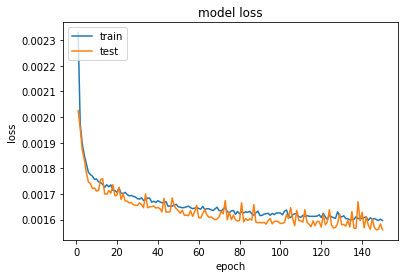

final train loss:  0.0015964346239343286
final test loss 0.0015598555328324437
########################################

model no: 2


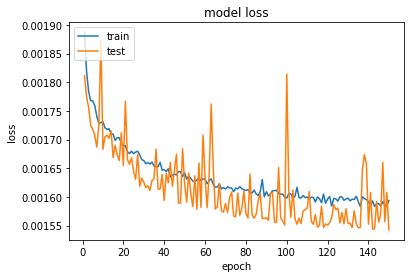

final train loss:  0.0015937562566250563
final test loss 0.001542378100566566
########################################

model no: 3


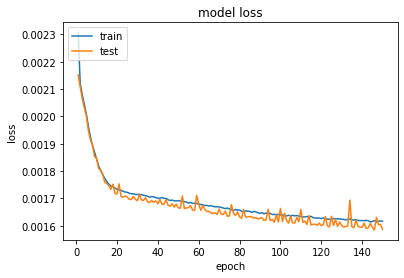

final train loss:  0.0016168380388990045
final test loss 0.0015865792520344257
########################################

model no: 4


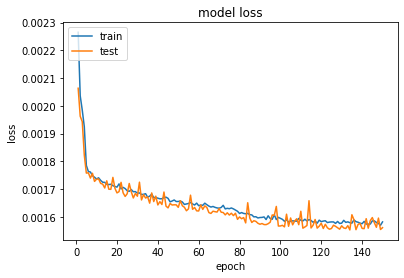

final train loss:  0.0015817646635696292
final test loss 0.0015610227128490806
########################################

model no: 5


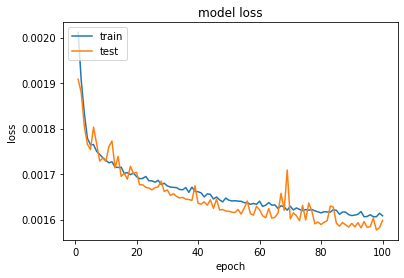

final train loss:  0.0016082130605354905
final test loss 0.0015978519804775715
########################################



In [35]:
# Print out the graph of the 5 best models 
for i in range(5):
    print('model no: ' + str(i + 1))
    lossPlot(df.sort_values(["rank_test_score"])['params'].iloc[i])
    print('#'*40 + '\n')

**choose model 1 because the test accuracy didn't flucuate that much and didn't overfit**

In [79]:
# initial hyperparameters
optimizer = 'Adam'
first_layer_nodes  = 10
last_layer_nodes  = 1
n_layers = 5
activation = 'relu'
loss = "mean_absolute_error"
batch_size = 64
epochs = 150
learning_rate = 0.0001

# initial_param is a dictionary that has hyperparameters and its values
initial_param = dict(optimizer=optimizer,
                  first_layer_nodes = first_layer_nodes,
                  last_layer_nodes = last_layer_nodes,
                  n_layers = n_layers,
                  activation = activation,
                  loss = loss,
                  batch_size = batch_size,
                  epochs = epochs,
                  learning_rate = learning_rate)

initial_param

{'optimizer': 'Adam',
 'first_layer_nodes': 10,
 'last_layer_nodes': 1,
 'n_layers': 5,
 'activation': 'relu',
 'loss': 'mean_absolute_error',
 'batch_size': 64,
 'epochs': 150,
 'learning_rate': 0.0001}

# **4. hyperparameters tuning**

## 4.1 all hyperparameters vs accuracy

In [159]:
def plotHyperparam(initial_param, name, value):
    '''
    Plot train and test accuracy
    
    Parameter
    -----------------
    initial_param - a dictionary defined in the above cell
    name - name of the hyperparameter
    value - hyperaparemeter values
    
    Return
    ------------------
    The graph of accuracy vs the values of hyperparameter
    '''
    out = pd.DataFrame(columns=['Parameters', 'train_acc', 'test_acc'])  # dictionary of train and test records
    for param in value:
        # set hyperparameters
        temp_param = initial_param.copy()
        temp_param[name] = param
        
        # train the model
        model = KerasRegressor(build_fn=create_model, verbose=0).set_params(**temp_param)
        model.fit(X_train, y_train ,batch_size = temp_param['batch_size'], epochs = temp_param['epochs'], verbose=0)
        
        # accuracy score
        MAPE_train = np.mean(100 * (np.abs(y_train-model.predict(X_train))/y_train))
        MAPE_test = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
        
        # record the result
        out=out.append(pd.DataFrame(data=[[str(param), 100-MAPE_train ,100-MAPE_test]], columns=['Parameters', 'train_acc', 'test_acc']))
    print(out)
    
    # plot train and test accuracy (only train accuracy >= 0)
    out = out[out['train_acc']>=0]
    plt.plot(out['Parameters'], out['train_acc'], label = "train_acc")
    plt.plot(out['Parameters'], out['test_acc'], label = "test_acc")
    plt.xlabel(name)
    plt.ylabel('Accuracy')
    plt.title(name + ' plotting')
    plt.legend()
    plt.show()
    
def top5models(param_grid, n_config):
    '''
    Plot the loss vs number of epochs 
    
    Parameter
    ------------------
    param_grid - a dictionary that has hyperparameters and its values
    n_config - number of iterations
    
    Return
    ------------------
    The graph of the loss vs number of epochs
    '''
    print('start')
    start = timeit.default_timer()
    # load dataset
    X = X_train
    Y = y_train
    # create model
    model = KerasRegressor(build_fn=create_model, verbose=0)
    grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, scoring=custom_Scoring, n_iter=n_config, cv=5, n_jobs = -1)
    grid_result = grid.fit(X, Y)
    stop = timeit.default_timer()
    print('total run time: ', (stop - start), 'Sec')
    df = pd.DataFrame(grid_result.cv_results_)
    # Display the 5 best models
    for i in range(5):
        print('model no: ' + str(i + 1))
        for param in df.sort_values(["rank_test_score"])['params'].iloc[i]:
            print(param,':', df.sort_values(["rank_test_score"])['params'].iloc[i][param])
        print('mean test score: ', df.sort_values(["rank_test_score"])['mean_test_score'].iloc[i])
        lossPlot(df.sort_values(["rank_test_score"])['params'].iloc[i])
        print('#'*40 + '\n')

  Parameters  train_acc   test_acc
0          2  71.304767  71.320263
0          4  73.009090  73.144298
0          8  60.792316  61.364103
0         16  70.124582  70.383478
0         32  73.099316  73.025762
0         64  72.242853  72.235568
0        128  70.245607  70.309523
0        256  72.607210  72.377699
0        512  68.773511  69.177576
0       1024  71.154529  71.446754
0       2048  70.526471  70.284390


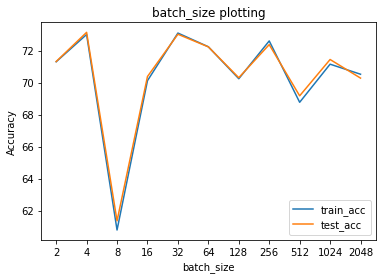

In [137]:
# plot the number of batch_size
plotHyperparam(initial_param, 'batch_size', [2,4,8, 16, 32, 64, 128, 256, 512, 1024, 2048])

  Parameters  train_acc   test_acc
0          5  65.582078  65.706796
0         10  59.396716  59.948301
0         50  73.041267  72.936177
0         75  71.616549  71.723434
0        100  69.618933  69.918678
0        150  69.286906  69.506809
0        200  73.361813  73.314716
0        350  66.833667  67.184070
0        500  74.018569  73.872216
0        750  73.918934  73.971462
0       1000  74.389172  74.069361
0       1500  72.856702  72.858666
0       2000  72.349901  72.298816


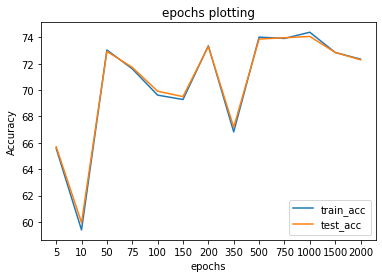

In [136]:
# plot the number of epochs
plotHyperparam(initial_param, 'epochs', [5, 10, 50, 75, 100, 150, 200, 350, 500, 750, 1000, 1500, 2000])

  Parameters     train_acc      test_acc
0     0.0001     72.145739     72.132940
0      0.001     73.948075     73.807231
0       0.01     62.478641     63.054500
0        0.1    -24.556080    -21.936986
0          1  -1887.472606  -1864.392272
0         10 -39264.849815 -38828.503052


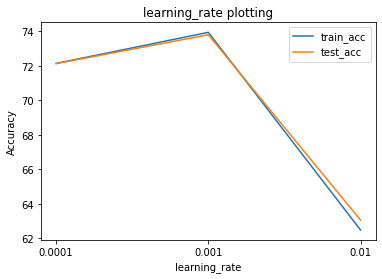

In [138]:
# plot the values of the learning_rate
plotHyperparam(initial_param, 'learning_rate', [0.0001, 0.001, 0.01, 0.1, 1, 10])

  Parameters  train_acc   test_acc
0          2  70.065162  70.269526
0          3  69.962909  70.229215
0          5  72.856002  72.921117
0          7  72.483991  72.602137
0          9  71.481981  71.713120
0         12  72.906321  72.796806
0         15  60.057628  60.617666
0         20  58.598932  59.149786


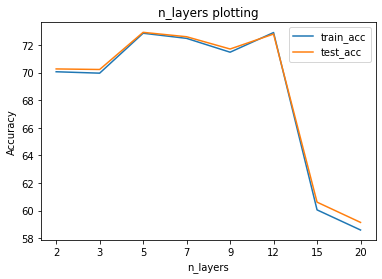

In [140]:
# plot the number of layers
plotHyperparam(initial_param, 'n_layers', [2,3,5,7,9,12,15,20])

  Parameters  train_acc   test_acc
0          2  59.988779  60.548065
0          3  61.099799  61.675595
0          5  60.471771  61.039217
0         10  71.502243  71.623311
0         15  72.777697  72.699656
0         20  73.345563  73.168252
0         25  74.354710  74.101674
0         30  69.184953  69.203628
0         40  72.977746  72.673134
0         50  74.157755  73.784018
0         60  74.815329  74.458015
0         70  72.798912  72.515564


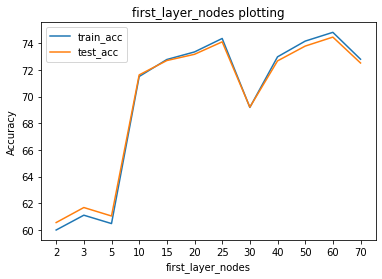

In [143]:
# plot the number of first_layer_nodes
plotHyperparam(initial_param, 'first_layer_nodes', [2,3,5,10,15,20,25,30,40,50,60,70])

  Parameters  train_acc   test_acc
0        SGD  59.978818  60.511986
0    RMSprop  73.363875  73.131653
0       Adam  71.977998  71.991291
0     Adamax  73.534759  73.283125
0      Nadam  71.868871  71.749006


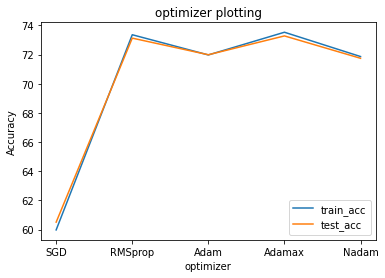

In [144]:
# plot the optimizer
plotHyperparam(initial_param, 'optimizer', ['SGD', 'RMSprop', 'Adam', 'Adamax', "Nadam"])

  Parameters  train_acc   test_acc
0    softmax  56.042661  56.638553
0       relu  69.830884  69.698394
0       tanh  71.070957  71.316889
0    sigmoid  59.109174  59.585455


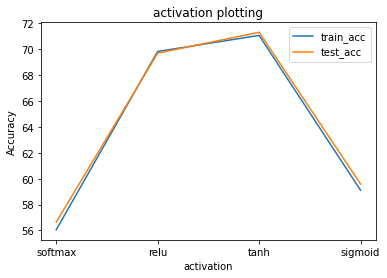

In [145]:
# plot the activation function
plotHyperparam(initial_param, 'activation', ['softmax', 'relu', 'tanh', 'sigmoid'])

                       Parameters  train_acc   test_acc
0              mean_squared_error  71.364970  71.604588
0             mean_absolute_error  73.431387  73.440095
0  mean_squared_logarithmic_error -35.310774 -35.383296


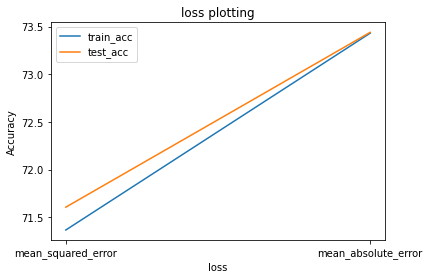

In [146]:
# plot the loss function
plotHyperparam(initial_param, 'loss', ["mean_squared_error", "mean_absolute_error", "mean_squared_logarithmic_error"])

## 4.2 phase 1: random search for optimizer, activation, and learning rate

start
total run time:  221.44820869999967 Sec
model no: 1
optimizer : RMSprop
n_layers : 5
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 10
epochs : 150
batch_size : 64
activation : relu
mean test score:  72.29300880079086


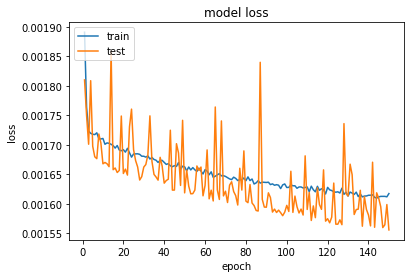

final train loss:  0.0016175233758985996
final test loss 0.001555900787934661
########################################

model no: 2
optimizer : Adam
n_layers : 5
loss : mean_absolute_error
learning_rate : 0.001
last_layer_nodes : 1
first_layer_nodes : 10
epochs : 150
batch_size : 64
activation : tanh
mean test score:  71.64539241966284


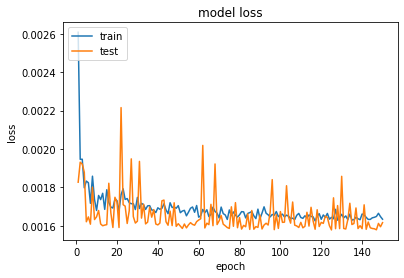

final train loss:  0.0016342136077582836
final test loss 0.0016162673709914088
########################################

model no: 3
optimizer : Adamax
n_layers : 5
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 10
epochs : 150
batch_size : 64
activation : tanh
mean test score:  71.44035763622853


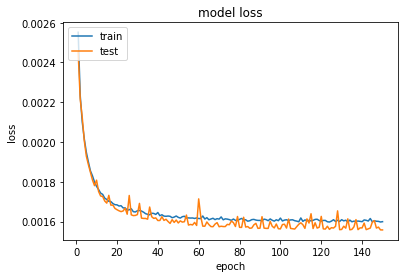

final train loss:  0.0015999036841094494
final test loss 0.0015584388747811317
########################################

model no: 4
optimizer : RMSprop
n_layers : 5
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 10
epochs : 150
batch_size : 64
activation : tanh
mean test score:  71.30829208724731


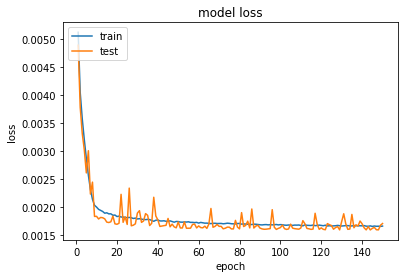

final train loss:  0.001666184514760971
final test loss 0.0017121138516813517
########################################

model no: 5
optimizer : Adamax
n_layers : 5
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 10
epochs : 150
batch_size : 64
activation : relu
mean test score:  71.14172011096355


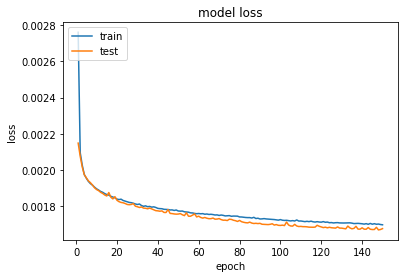

final train loss:  0.0016972469165921211
final test loss 0.0016760776052251458
########################################



In [160]:
# fix loss = mean_absolute_error
# find optimizer, activation, and learning rate
# the rest = defult value

# define hyperparameters
optimizer = ['Adam', 'RMSprop', 'Adamax']
first_layer_nodes  = [10]
last_layer_nodes  = [1]
n_layers = [5]
activation = ['relu', 'tanh']
loss = ["mean_absolute_error"]
batch_size = [64]
epochs = [150]
learning_rate = [0.0001, 0.001]

# param_grid is a dictionary that has hyperparameters and its values
param_grid = dict(optimizer=optimizer,
                  first_layer_nodes = first_layer_nodes,
                  last_layer_nodes = last_layer_nodes,
                  n_layers = n_layers,
                  activation = activation,
                  loss = loss,
                  batch_size = batch_size,
                  epochs = epochs,
                  learning_rate = learning_rate)

# n_config is a number of iterations
n_config = 10

# print out the 5 best models
top5models(param_grid, n_config)

**choose model 5 because the test accuracy didn't flucuate and overfit**

## 4.3 phase 1: hyperparameters plotting for the selected model

  Parameters  train_acc   test_acc
0          2  74.128166  74.084992
0          4  59.743116  60.298089
0          8  58.976934  59.526604
0         16  72.269453  72.368623
0         32  69.597016  69.868795
0         64  59.521630  60.074650
0        128  72.930410  72.669643
0        256  68.691513  68.560831
0        512  70.259921  70.221625
0       1024  69.879861  70.225876
0       2048  64.613842  64.949811


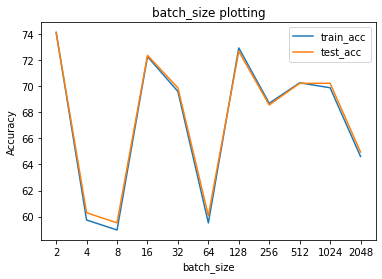

In [161]:
# plot batch size, epochs, n_layers, and first_layer on model 5
optimizer = 'Adamax'
first_layer_nodes  = 10
last_layer_nodes  = 1
n_layers = 5
activation = 'relu'
loss = "mean_absolute_error"
batch_size = 64
epochs = 150
learning_rate = 0.0001

# initial_param is a dictionary that has hyperparameters and its values
initial_param = dict(optimizer=optimizer,
                  first_layer_nodes = first_layer_nodes,
                  last_layer_nodes = last_layer_nodes,
                  n_layers = n_layers,
                  activation = activation,
                  loss = loss,
                  batch_size = batch_size,
                  epochs = epochs,
                  learning_rate = learning_rate)

# plot number of batch_size
plotHyperparam(initial_param, 'batch_size', [2,4,8, 16, 32, 64, 128, 256, 512, 1024, 2048])

  Parameters  train_acc   test_acc
0          5  67.011825  67.056312
0         10  70.443520  70.360170
0         50  70.363439  70.636988
0         75  72.464032  72.388177
0        100  72.219723  71.955578
0        150  68.951879  69.241207
0        200  71.482770  71.750633
0        350  72.535878  72.598265
0        500  71.604951  71.320800
0        750  71.288026  71.470978
0       1000  73.104907  73.039089
0       1500  73.211905  73.057102
0       2000  72.792779  72.799260


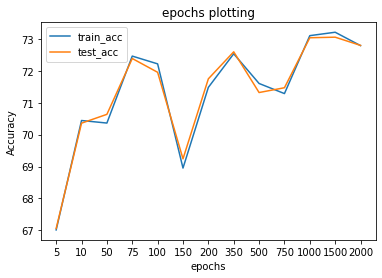

In [162]:
# plot number of epochs
plotHyperparam(initial_param, 'epochs', [5, 10, 50, 75, 100, 150, 200, 350, 500, 750, 1000, 1500, 2000])

  Parameters  train_acc   test_acc
0          2  72.953012  73.102774
0          3  71.023541  71.004202
0          5  59.514230  60.066959
0          7  67.998526  68.076102
0          9  71.262058  71.439597
0         12  59.277993  59.828545
0         15  59.860130  60.416821
0         20  59.216916  59.767115


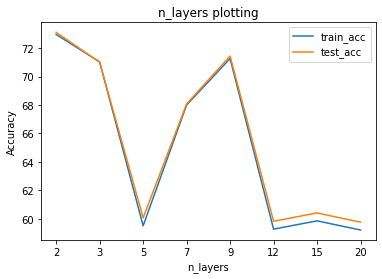

In [163]:
# plot the number of layers
plotHyperparam(initial_param, 'n_layers', [2,3,5,7,9,12,15,20])

  Parameters  train_acc   test_acc
0          2  69.561289  69.822030
0          3  58.027270  58.587576
0          5  59.968048  60.526975
0         10  58.195825  58.752687
0         15  72.767362  72.758475
0         20  72.421678  72.449555
0         25  72.473444  72.306566
0         30  72.176971  72.174465
0         40  73.612190  73.554397
0         50  73.657426  73.468616
0         60  74.116959  73.671417
0         70  73.177185  72.936708


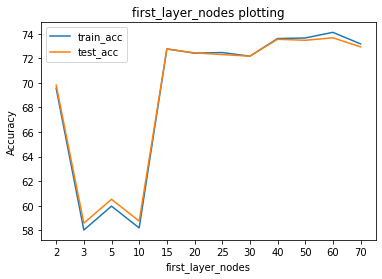

In [164]:
# plot the number of the first_layer_nodes
plotHyperparam(initial_param, 'first_layer_nodes', [2,3,5,10,15,20,25,30,40,50,60,70])

## 4.4 phase 2: random search for first_layer_nodes, and n_layers

start
total run time:  594.9297830000141 Sec
model no: 1
optimizer : Adamax
n_layers : 7
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 70
epochs : 150
batch_size : 64
activation : relu
mean test score:  73.99855317204349


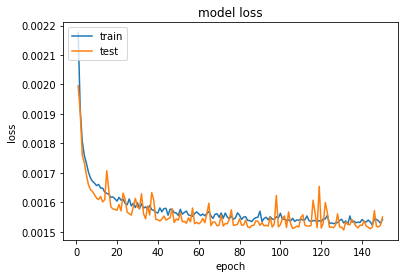

final train loss:  0.001542078796774149
final test loss 0.0015499653527513146
########################################

model no: 2
optimizer : Adamax
n_layers : 9
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 40
epochs : 150
batch_size : 64
activation : relu
mean test score:  73.74325485331192


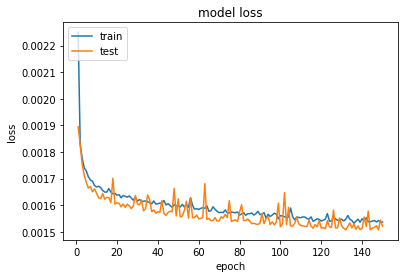

final train loss:  0.0015371155459433794
final test loss 0.0015207023825496435
########################################

model no: 3
optimizer : Adamax
n_layers : 9
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 50
epochs : 150
batch_size : 64
activation : relu
mean test score:  73.59714633157623


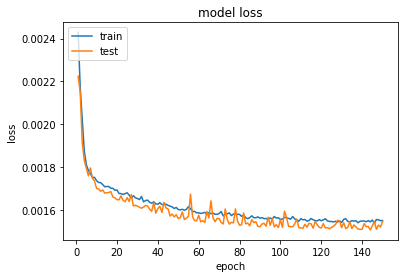

final train loss:  0.0015504686161875725
final test loss 0.0015454809181392193
########################################

model no: 4
optimizer : Adamax
n_layers : 5
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 80
epochs : 150
batch_size : 64
activation : relu
mean test score:  73.35875865022533


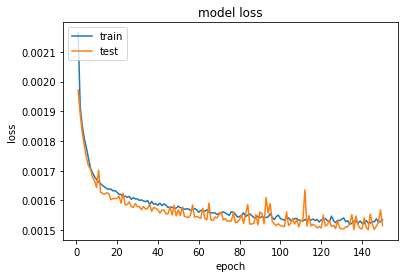

final train loss:  0.0015349796740338206
final test loss 0.0015151379629969597
########################################

model no: 5
optimizer : Adamax
n_layers : 3
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 70
epochs : 150
batch_size : 64
activation : relu
mean test score:  73.08946906108888


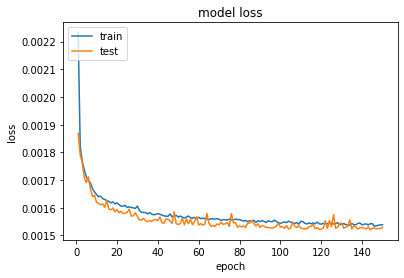

final train loss:  0.0015388720203191042
final test loss 0.001529653905890882
########################################



In [166]:
# fix loss = mean_absolute_error, lr = 0.0001, optimizer = Adamax, activation = relu
# fix epoch = 150, batch size = 64
# find first_layer_nodes (15 to 80), n_layers (2 to 9), > 12 had low acc

# define hyperparameters
optimizer = ['Adamax']
first_layer_nodes  = [15, 20, 30, 40, 50, 60, 70, 80]
last_layer_nodes  = [1]
n_layers = [2,3,5,7,9]
activation = ['relu']
loss = ["mean_absolute_error"]
batch_size = [64]
epochs = [150]
learning_rate = [0.0001]

# param_grid is a dictionary that has hyperparameters and its values
param_grid = dict(optimizer=optimizer,
                  first_layer_nodes = first_layer_nodes,
                  last_layer_nodes = last_layer_nodes,
                  n_layers = n_layers,
                  activation = activation,
                  loss = loss,
                  batch_size = batch_size,
                  epochs = epochs,
                  learning_rate = learning_rate)

# n_config is a number of iterations
n_config = 30

# Print out the 5 best models
top5models(param_grid, n_config)

**choose model 5 because the test accuracy didn't flucuate that much and didn't overfit**

## 4.5 phase 2: hyperparameters plotting for the selected model

  Parameters  train_acc   test_acc
0          2  72.670236  72.684397
0          4  72.889992  72.867183
0          8  74.456377  74.111229
0         16  74.046629  73.733287
0         32  74.430254  74.128617
0         64  71.576100  71.300536
0        128  73.997626  73.583389
0        256  73.546833  73.326614
0        512  71.877872  72.008226
0       1024  71.789874  71.728262
0       2048  70.363999  70.323642


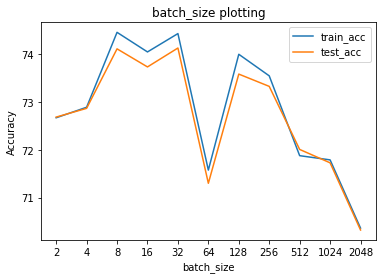

In [167]:
# plot batch size, epochs on model 5
optimizer = 'Adamax'
first_layer_nodes  = 70
last_layer_nodes  = 1
n_layers = 3
activation = 'relu'
loss = "mean_absolute_error"
batch_size = 64
epochs = 150
learning_rate = 0.0001

# initial_param is a dictionary that has hyperparameters and its values
initial_param = dict(optimizer=optimizer,
                  first_layer_nodes = first_layer_nodes,
                  last_layer_nodes = last_layer_nodes,
                  n_layers = n_layers,
                  activation = activation,
                  loss = loss,
                  batch_size = batch_size,
                  epochs = epochs,
                  learning_rate = learning_rate)

# plot the number of batch_size
plotHyperparam(initial_param, 'batch_size', [2,4,8, 16, 32, 64, 128, 256, 512, 1024, 2048])

  Parameters  train_acc   test_acc
0          5  71.604982  71.642604
0         10  71.198154  70.897031
0         50  72.174574  72.111553
0         75  72.897885  72.823661
0        100  73.203344  73.049494
0        150  74.296483  74.056223
0        200  73.573065  73.207056
0        350  71.797191  71.385715
0        500  74.112502  73.612476
0        750  73.116604  72.494715
0       1000  71.015611  70.477549
0       1500  74.794313  73.855153
0       2000  74.851867  73.697680


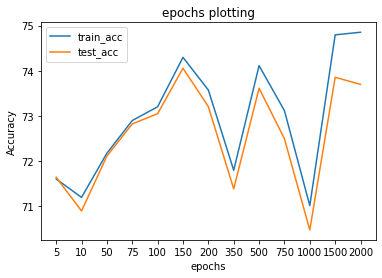

In [168]:
# plot the number of epochs
plotHyperparam(initial_param, 'epochs', [5, 10, 50, 75, 100, 150, 200, 350, 500, 750, 1000, 1500, 2000])

## 4.6 phase 3: random search for epochs, and batch size

start
total run time:  3082.326537800007 Sec
model no: 1
optimizer : Adamax
n_layers : 3
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 70
epochs : 200
batch_size : 64
activation : relu
mean test score:  73.60191521131935


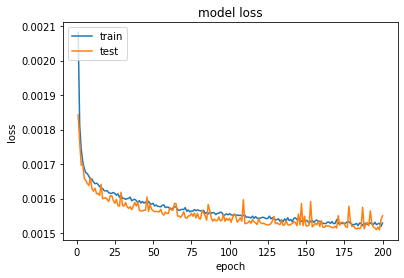

final train loss:  0.0015288759022951126
final test loss 0.0015502199530601501
########################################

model no: 2
optimizer : Adamax
n_layers : 3
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 70
epochs : 200
batch_size : 16
activation : relu
mean test score:  73.35753706526864


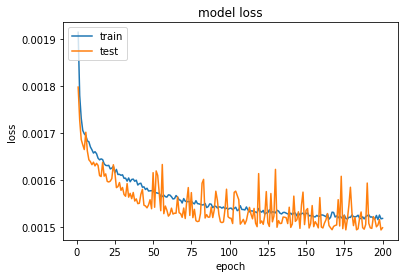

final train loss:  0.0015186634846031666
final test loss 0.001498799305409193
########################################

model no: 3
optimizer : Adamax
n_layers : 3
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 70
epochs : 450
batch_size : 16
activation : relu
mean test score:  73.29669708424147


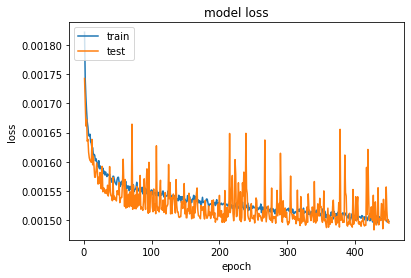

final train loss:  0.0014982196735218167
final test loss 0.0014953402569517493
########################################

model no: 4
optimizer : Adamax
n_layers : 3
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 70
epochs : 350
batch_size : 16
activation : relu
mean test score:  73.21765071086247


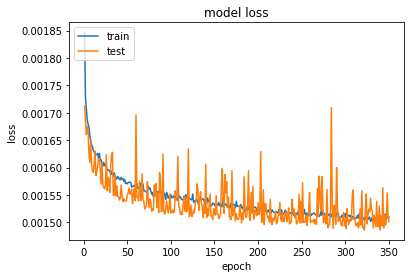

final train loss:  0.0015095212729647756
final test loss 0.0015008918708190322
########################################

model no: 5
optimizer : Adamax
n_layers : 3
loss : mean_absolute_error
learning_rate : 0.0001
last_layer_nodes : 1
first_layer_nodes : 70
epochs : 400
batch_size : 128
activation : relu
mean test score:  73.11865573450858


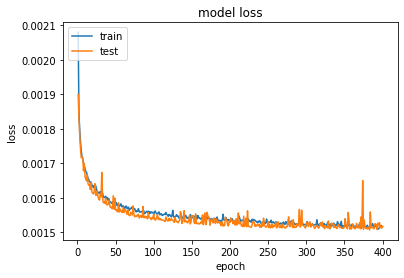

final train loss:  0.0015162731288000941
final test loss 0.0015170798869803548
########################################



In [169]:
# fix loss = mean_absolute_error, lr = 0.0001, optimizer = Adamax, activation = relu
# fix first_layer_nodes = 70, n_layers = 3
# find epochs (50 to 500), batch size (8 to 512)

# define hyperparameters
optimizer = ['Adamax']
first_layer_nodes  = [70]
last_layer_nodes  = [1]
n_layers = [3]
activation = ['relu']
loss = ["mean_absolute_error"]
batch_size = [8, 16, 32, 64, 128, 256, 512]
epochs = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
learning_rate = [0.0001]

# param_grid is a dictionary that has hyperparameters and its values
param_grid = dict(optimizer=optimizer,
                  first_layer_nodes = first_layer_nodes,
                  last_layer_nodes = last_layer_nodes,
                  n_layers = n_layers,
                  activation = activation,
                  loss = loss,
                  batch_size = batch_size,
                  epochs = epochs,
                  learning_rate = learning_rate)

# n_config is the number of iterations
n_config = 50

# print out the 5 best models
top5models(param_grid, n_config)

**choose model 1 because the test accuracy didn't flucuate that much and didn't overfit**

# **5. the best model**

start
train_acc:  74.37874356745812
test_acc:  74.17043407233253


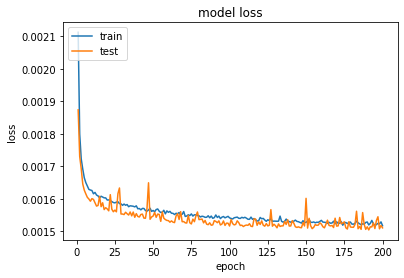

final train loss:  0.0015173912979662418
final test loss 0.0015107550425454974
total run time:  55.56435729999794 Sec


In [199]:
# define hyperparameters
optimizer = 'Adamax'
first_layer_nodes  = 70
last_layer_nodes  = 1
n_layers = 3
activation = 'relu'
loss = "mean_absolute_error"
batch_size = 64
epochs = 200
learning_rate = 0.0001

# best_param is a dictionary that has hyperparameters and its values
best_param = dict(optimizer=optimizer,
                  first_layer_nodes = first_layer_nodes,
                  last_layer_nodes = last_layer_nodes,
                  n_layers = n_layers,
                  activation = activation,
                  loss = loss,
                  batch_size = batch_size,
                  epochs = epochs,
                  learning_rate = learning_rate)



print('start')
start = timeit.default_timer()

# load dataset
X = X_train
Y = y_train

# create model
model = KerasRegressor(build_fn=create_model, verbose=0).set_params(**best_param)
model.fit(X_train, y_train ,batch_size = best_param['batch_size'], epochs = best_param['epochs'], verbose=0)
MAPE_train = np.mean(100 * (np.abs(y_train-model.predict(X_train))/y_train))
MAPE_test = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))

print('train_acc: ', 100-MAPE_train)
print('test_acc: ', 100-MAPE_test)

# Plot the best model
lossPlot(best_param)

stop = timeit.default_timer()
print('total run time: ', (stop - start), 'Sec')